In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
N=100
df=pd.DataFrame(dict(group=np.repeat([1,2], N*2),
                     y=np.append(np.append(np.random.normal(5,1,N),np.random.normal(2,1,N)),
                                 np.append(np.random.normal(1,1,N),np.random.normal(3,1,N))),
                     x=np.tile(["A","B","A","B"], N)))
df.shape

(400, 3)

In [3]:
df.head()

,group,y,x
0,1,5.139900,A
1,1,4.944379,B
2,1,5.189327,A
3,1,5.766952,B
4,1,4.928374,A


### 未调整箱型图和抖动散点图的间距

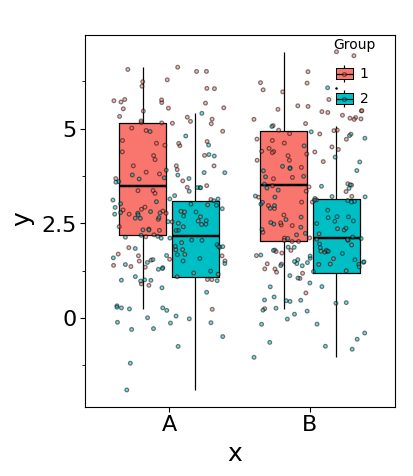

In [26]:
base_plot = (ggplot(df, aes(x='x', y='y', fill='factor(group)')) #数值型转换为类别型，factor(xx), R语言的语法
             + geom_boxplot(outlier_size=0, color='black')
             + geom_jitter(aes(group='factor(group)'), shape='o', size=1, alpha=0.5)# Scatter plot with points jittered to reduce overplotting
             + scale_fill_manual(values=["#F8766D","#00BFC4"], guide=guide_legend(title='Group'))
             + theme_matplotlib()
             + theme(axis_title=element_text(color='black', size=18, face='plain'), # Font face ("plain", "italic", "bold", "bold.italic")
                    axis_text=element_text(color='black', size=16, face='plain'),
                    legend_position=(0.8, 0.8),
                    legend_direction='vertical',
                    aspect_ratio=1.2,
                    dpi=100,
                    figure_size=(4, 3)) 
            )
print(base_plot)

### 调整抖动散点图的间距

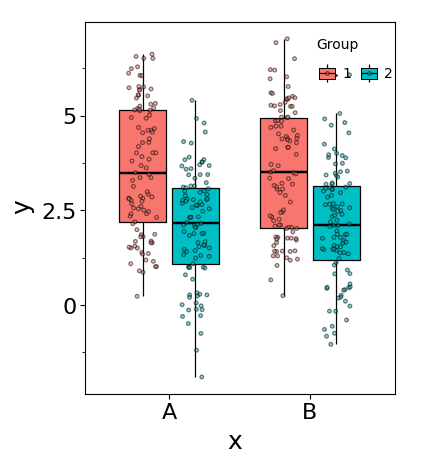

In [42]:
plot1 = (ggplot(df, aes(x='x', y='y', fill='factor(group)')) 
             + geom_boxplot(outlier_size=0, color='black')
             + geom_jitter(aes(group='factor(group)'), shape='o', size=1, alpha=0.5, position=position_jitterdodge())
             + scale_fill_manual(values=["#F8766D","#00BFC4"], guide=guide_legend(title='Group'))
             + theme_matplotlib()
             + theme(axis_title=element_text(color='black', size=18, face='plain'), 
                    axis_text=element_text(color='black', size=16, face='plain'),
                    legend_position=(0.8, 0.8),
#                     legend_direction='vertical',
                    aspect_ratio=1.2,
                    dpi=100,
                    figure_size=(4, 3)) 
            )
print(plot1) # 点明显往箱型图的中轴集中了

### 同时调整箱型图和抖动散点图的间距

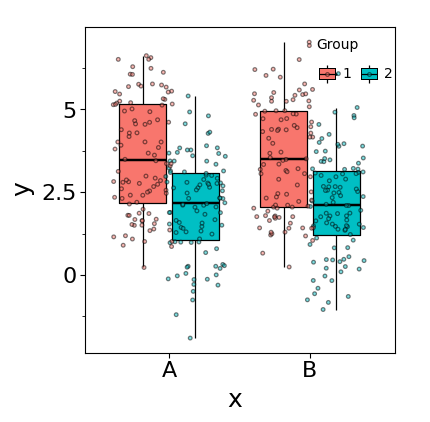

In [41]:
plot3 = (ggplot(df, aes(x='x', y='y', fill='factor(group)'))
         + geom_boxplot(color='black', outlier_size=0)
         + geom_jitter(aes(group='factor(group)'), 
                       shape='o', size=1, alpha=0.5, 
                       position=position_jitterdodge(jitter_width=0.85)) # 箱型变胖了
         + scale_fill_manual(values=["#F8766D","#00BFC4"], guide=guide_legend(title='Group'))
         + theme_matplotlib()
         + theme(axis_title=element_text(color='black', size=18),
                axis_text=element_text(color='black', size=16),
                legend_position=(0.8, 0.8),
#                 legend_direction='vertical',
                aspect_ratio=1.05,
                dpi=100,
                figure_size=(4, 2))
        )
print(plot3)